<a href="https://colab.research.google.com/github/Vasyl808/deepfake_video_detection/blob/main/cnn_lstm_fakeavceleb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install facenet_pytorch --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.0 MB/s eta 0:00:00


In [2]:
!unzip /content/drive/MyDrive/data/FakeAVCeleb_v1.2.zip

Показано результат, скорочений до останніх рядків (5000).
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01075_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01216_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01231_XXpYdOHUF-g.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01238_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id02466_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03556_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03605_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03707_pwNcRPQ5qdo.mp4  
  inflating: FakeAVCeleb

In [3]:
!unzip /content/drive/MyDrive/data/archive_uadfv.zip

Archive:  /content/drive/MyDrive/data/archive_uadfv.zip
  inflating: fake_videos/test/fake/0046_fake.mp4  
  inflating: fake_videos/test/fake/0047_fake.mp4  
  inflating: fake_videos/test/fake/0048_fake.mp4  
  inflating: fake_videos/test/real/0046.mp4  
  inflating: fake_videos/test/real/0047.mp4  
  inflating: fake_videos/test/real/0048.mp4  
  inflating: fake_videos/train/fake/0000_fake.mp4  
  inflating: fake_videos/train/fake/0001_fake.mp4  
  inflating: fake_videos/train/fake/0002_fake.mp4  
  inflating: fake_videos/train/fake/0003_fake.mp4  
  inflating: fake_videos/train/fake/0004_fake.mp4  
  inflating: fake_videos/train/fake/0005_fake.mp4  
  inflating: fake_videos/train/fake/0006_fake.mp4  
  inflating: fake_videos/train/fake/0007_fake.mp4  
  inflating: fake_videos/train/fake/0008_fake.mp4  
  inflating: fake_videos/train/fake/0009_fake.mp4  
  inflating: fake_videos/train/fake/0010_fake.mp4  
  inflating: fake_videos/train/fake/0011_fake.mp4  
  inflating: fake_videos/trai

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/FakeAVCeleb/meta_data.csv')

df

,source,target1,target2,method,category,type,race,gender,path,Unnamed: 9
0,id00076,-,-,real,A,RealVideo-RealAudio,African,men,00109.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...
1,id00166,-,-,real,A,RealVideo-RealAudio,African,men,00010.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...
2,id00173,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...
3,id00366,-,-,real,A,RealVideo-RealAudio,African,men,00118.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...
4,id00391,-,-,real,A,RealVideo-RealAudio,African,men,00052.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...
...,...,...,...,...,...,...,...,...,...,...
21561,id07689,id06254,-,wav2lip,D,FakeVideo-FakeAudio,Asian (South),women,00028_id06254_wavtolip.mp4,FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/...
21562,id07689,id06343,-,wav2lip,D,FakeVideo-FakeAudio,Asian (South),women,00028_id06343_wavtolip.mp4,FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/...
21563,id07689,id07008,-,wav2lip,D,FakeVideo-FakeAudio,Asian (South),women,00028_id07008_wavtolip.mp4,FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/...
21564,id07689,id07377,-,wav2lip,D,FakeVideo-FakeAudio,Asian (South),women,00028_id07377_wavtolip.mp4,FakeAVCeleb/FakeVideo-FakeAudio/Asian (South)/...


In [17]:
import json
import os


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = '/content/' + row['Unnamed: 9'] + s + row['path']

    label = row['category']


    result[file_path] = {
        'label': label
    }


with open('output_1.json', 'w') as json_file:
    json.dump(result, json_file, indent=4)

In [70]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from facenet_pytorch import MTCNN
import shutil
import matplotlib.pyplot as plt
from pathlib import Path


class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        """n_audio_reads controls the length of the audio sequence: 5000 readings/sec."""
        self.n_frames = n_frames
        self.n_audio_reads = n_audio_reads
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device='cpu', post_process=False)

        for i in range(len(folders)):
            if train:
                if i == 0:
                    with open('output_1.json') as f:
                        videos = json.load(f)
                        videos = [(video, metadata) for (video, metadata) in videos.items()]
                        self.videos += videos
                else:
                    with open(os.path.join("test.json")) as f:
                        videos = json.load(f)
                        videos = [(os.path.join(folders[i], video), metadata) for (video, metadata) in videos.items()]
                        self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

    def __process_frame(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        face = self.detector(frame)
        if face is None:
            face = torch.zeros((3, 160, 160))
        face = face / 255  # Normalize to [0, 1]
        return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо кадри, поки не досягнемо необхідної кількості
            num_repeats = (self.n_frames) // len(frames) + 1
            frames = frames * num_repeats
            frames = frames[:self.n_frames]
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші 30 кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Якщо це символічне посилання на відео, розв'язати його
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)

        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            # Перетворюємо кадр на формат, що підходить для PyTorch
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Перетворюємо у RGB
            frame = cv2.resize(frame, (224, 224))
            frame = torch.tensor(frame).permute(2, 0, 1).float() / 255.0
            frames.append(frame)
        cap.release()
        frames = self.__pad_or_trim_frames(frames)
        # Стекуємо кадри в один тензор
        frames = torch.stack(frames).to(self.device)

        # Повертаємо дані
        if self.train:
            label = 1.0
            if metadata['label'] == 'C' or metadata['label'] == 'D':
                label = 0.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames
    def __len__(self):
        return len(self.videos)

Label: tensor([1.], device='cuda:0')


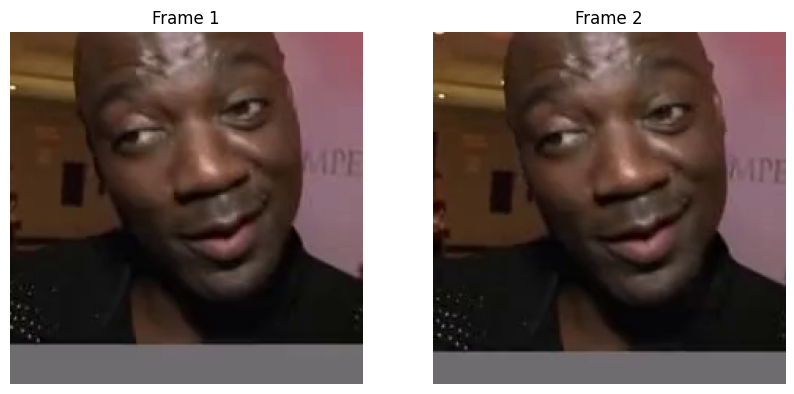

In [71]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        for j in range(2):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [64]:
class FaceDeepfakeDatasetTest(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        """n_audio_reads controls the length of the audio sequence: 5000 readings/sec."""
        self.n_frames = n_frames
        self.n_audio_reads = n_audio_reads
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device='cpu', post_process=False)
        for i in range(len(folders)):
            if train:
                #print(folders[i])
                for item in os.listdir(folders[i]):
                    item_path = os.path.join(folders[i], item)
                    if str(os.path.basename(item_path)) == 'fake':
                        for curr in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, curr)):
                                metadata = {}
                                metadata['label']='fake'
                                self.videos += [(os.path.join(item_path, curr), metadata)]
                    else:
                        for item_file in os.listdir(item_path):
                            if os.path.isfile(os.path.join(item_path, item_file)):
                                metadata = {}
                                metadata['label']='real'
                                self.videos += [(os.path.join(item_path, item_file), metadata)]
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

    def __process_frame(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя

        if boxes is None:
            # Повертаємо порожній кадр, якщо обличчя не знайдено
            face = torch.zeros((3, 224, 224))
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]

            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300

            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)

        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame))
        '''total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        step = max(1, total_frames // self.n_frames)

        for i in range(self.n_frames):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i * step)
            ret, frame = cap.read()
            if ret:
                frames.append(self.__process_frame(frame))
            else:
                break'''
        cap.release()
        frames = torch.stack(frames).to(self.device)

        # Return data
        if self.train:
            label = 1.0
            if metadata['label'] == 'fake':
                label = 0.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

Label: tensor([0.], device='cuda:0')


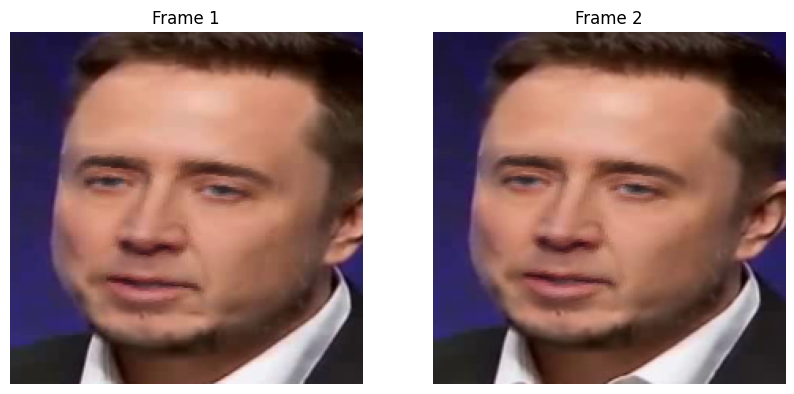

In [54]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/fake_videos/train']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDatasetTest(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        for j in range(2):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [72]:
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
import torchvision.models as models


class FaceClassifier(nn.Module):
    def __init__(self, n_linear_hidden=256, lstm_hidden_dim=128, num_lstm_layers=1, dropout=0.1):
        super(FaceClassifier, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b0(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])  # Виключаємо шар класифікації

        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Розмір виходу від feature extractor
        self.feature_output_size = 1280  # EfficientNet B7 дає 2560 ознак

        # LSTM для обробки послідовності ознак кожного кадру
        self.lstm = nn.LSTM(input_size=self.feature_output_size,
                            hidden_size=lstm_hidden_dim,
                            num_layers=num_lstm_layers,
                            batch_first=True,
                            bidirectional=True)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(2 * lstm_hidden_dim, n_linear_hidden)  # множимо на 2 через bidirectional LSTM
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        # Витягання ознак для кожного кадру
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        # Переформатовуємо ознаки для LSTM
        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка послідовності кадрів через LSTM
        lstm_out, _ = self.lstm(vid_features)  # lstm_out: (batch_size, num_frames, 2 * lstm_hidden_dim)

        # Використання середнього значення по кадрам для об'єднання послідовності (можна також використовувати останній кадр або інші методи агрегації)
        lstm_out = torch.mean(lstm_out, dim=1)  # (batch_size, 2 * lstm_hidden_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(lstm_out))
        x = self.fc2(x)

        return x

all train folders: ['/content/'], <class 'list'>
all test folders: ['/content/fake_videos/train'], <class 'list'>


<ipython-input-77-8ba700ad9004>:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/data/classifier_30_small.pt', map_

start time: 2024-11-06 19:28:30.587343
using device: cuda
1347


/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:132: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
1347it [3

[[19735   809]
 [   37   963]]
Classification Report (Train Set):
              precision    recall  f1-score   support

        Fake       1.00      0.96      0.98     20544
        Real       0.54      0.96      0.69      1000

    accuracy                           0.96     21544
   macro avg       0.77      0.96      0.84     21544
weighted avg       0.98      0.96      0.97     21544

......
epoch: 0, train loss: 0.19500194541249513, val loss: 43.77793674510516, executed in: 2309.4767990112305
train total: 21544, train correct: 20698.0, train incorrect: 846.0, train accuracy: 0.960731565952301
valid total: 82, valid correct: 39.0, valid incorrect: 43.0, valid accuracy: 0.47560974955558777


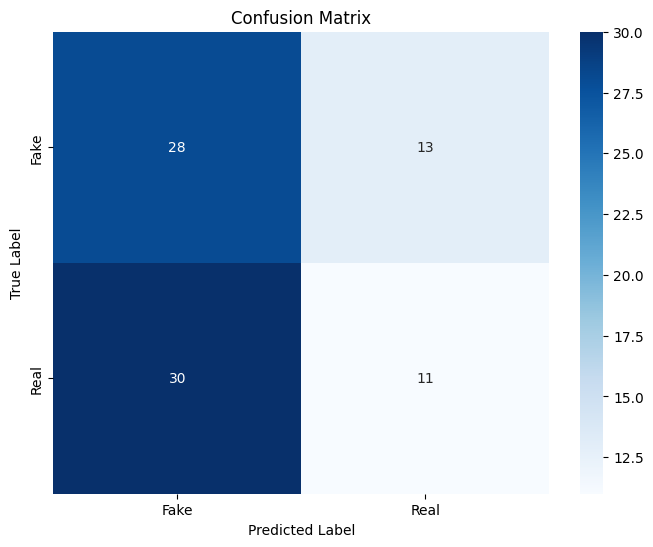

Classification Report:
              precision    recall  f1-score   support

        Fake       0.48      0.68      0.57        41
        Real       0.46      0.27      0.34        41

    accuracy                           0.48        82
   macro avg       0.47      0.48      0.45        82
weighted avg       0.47      0.48      0.45        82



1347it [33:10,  1.48s/it]


[[19937   607]
 [   18   982]]
Classification Report (Train Set):
              precision    recall  f1-score   support

        Fake       1.00      0.97      0.98     20544
        Real       0.62      0.98      0.76      1000

    accuracy                           0.97     21544
   macro avg       0.81      0.98      0.87     21544
weighted avg       0.98      0.97      0.97     21544

......
epoch: 1, train loss: 0.1421103719320055, val loss: 31.90377849873524, executed in: 2299.269369125366
train total: 21544, train correct: 20919.0, train incorrect: 625.0, train accuracy: 0.9709896445274353
valid total: 82, valid correct: 39.0, valid incorrect: 43.0, valid accuracy: 0.47560974955558777


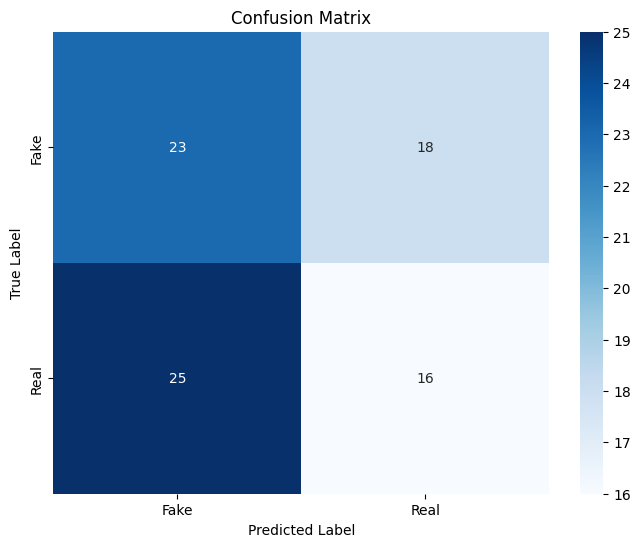

Classification Report:
              precision    recall  f1-score   support

        Fake       0.48      0.56      0.52        41
        Real       0.47      0.39      0.43        41

    accuracy                           0.48        82
   macro avg       0.47      0.48      0.47        82
weighted avg       0.47      0.48      0.47        82



1347it [32:59,  1.47s/it]


[[19977   567]
 [   19   981]]
Classification Report (Train Set):
              precision    recall  f1-score   support

        Fake       1.00      0.97      0.99     20544
        Real       0.63      0.98      0.77      1000

    accuracy                           0.97     21544
   macro avg       0.82      0.98      0.88     21544
weighted avg       0.98      0.97      0.98     21544

......
epoch: 2, train loss: 0.12304749462104737, val loss: 27.624162542425136, executed in: 2277.1516728401184
train total: 21544, train correct: 20958.0, train incorrect: 586.0, train accuracy: 0.9727998971939087
valid total: 82, valid correct: 39.0, valid incorrect: 43.0, valid accuracy: 0.47560974955558777


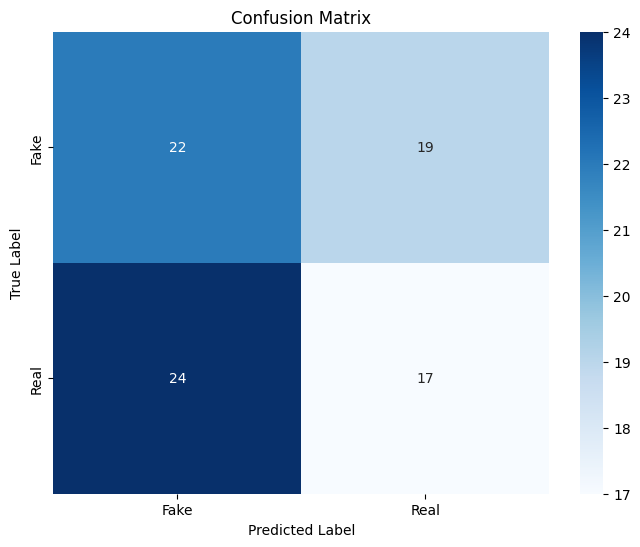

Classification Report:
              precision    recall  f1-score   support

        Fake       0.48      0.54      0.51        41
        Real       0.47      0.41      0.44        41

    accuracy                           0.48        82
   macro avg       0.48      0.48      0.47        82
weighted avg       0.48      0.48      0.47        82



1333it [32:45,  1.51s/it]

In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


base_path = 'deepfake-detection-challenge'

#train_folder = os.listdir(str(sys.argv[1]))
train_folders = ['/content/']


#test_folder = os.listdir(str(sys.argv[2]))
test_folders = ['/content/fake_videos/train']

batch_size = int(16)
num_epochs = int(1)
n_frames = int(30)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")
# AUTOENCODER = 'autoencoder_H10M46S22_04-11-21.pt'

# batch_size = 10
# num_epochs = 1
# epoch_size = 500
# n_frames = 30
milestones = [6,12,18]
gamma = 0.1
n_vid_features = 36*36 # 3600
n_aud_features = 1
n_head = 8
n_layers = 6

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#autoencoder = FaceAutoencoder()
#if len(sys.argv) > 7:
#    print("pretrained autoencoder is loaded")
#    AUTOENCODER = str(sys.argv[7])
#    autoencoder.load_state_dict(torch.load(AUTOENCODER, map_location=device))
#autoencoder.to(device)
#autoencoder.eval()

model = FaceClassifier()
model.load_state_dict(torch.load('/content/drive/MyDrive/data/3_classifier_30_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 20.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss(pos_weight=weights_tensor[1])
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device)
# dataset_size = len(dataset)
# val_split = .3
# val_size = int(val_split * dataset_size)
# train_size = dataset_size - val_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    # plt.figure(figsize=(8, 6))
    #sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    #plt.xlabel('Predicted Label')
    #plt.ylabel('True Label')
    #plt.title('Confusion Matrix (Train Set)')
    #plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Fake', 'Real']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Fake', 'Real']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/data/{3}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/data/{3}_classifier_{n_frames}_small.pt')

torch.save(model.state_dict(), f'classifier_{n_frames}_ex.pt')
end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

#df = pd.DataFrame()
#df['train_loss'] = train_losses.cpu().numpy()
#df['val_loss'] = val_losses.cpu().numpy()
#df['train_acc'] = train_accuracies.cpu().numpy()
#df['val_acc'] = val_accuracies.cpu().numpy()
#df['epoch_times'] = epoch_times

#df.to_csv(f'train_classifier_nframes{n_frames}_bs{batch_size}_lr{lr}.csv', index=False)